In [ ]:
import pandas as pd

In [ ]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# You can also drop whichever other columns you'd like here
titanic_df.drop("Cabin", axis=1, inplace=True)

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [ ]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [ ]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,0,1


Now, we do the same to the "Embarked" column.

In [ ]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1


Step 1: Load the Dataset

In [2]:
import pandas as pd

# Load the dataset
titanic_data = pd.read_csv('titanic.csv')


Step 2: Select Relevant Variables

In [4]:
# Select relevant features and target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target = 'Survived'


Step 3: Data Preprocessing

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Handle missing values
imputer = SimpleImputer(strategy='mean')
titanic_data['Age'] = imputer.fit_transform(titanic_data[['Age']])

# Encode categorical variables
titanic_data['Sex'] = LabelEncoder().fit_transform(titanic_data['Sex'])

# Split the data into training, development, and test sets
train_data, test_data = train_test_split(titanic_data, test_size=0.2, random_state=42)
train_data, dev_data = train_test_split(train_data, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

X_train = train_data[features]
y_train = train_data[target]
X_dev = dev_data[features]
y_dev = dev_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_dev = scaler.transform(X_dev)
X_test = scaler.transform(X_test)


Step 4: Train a Decision Tree Model

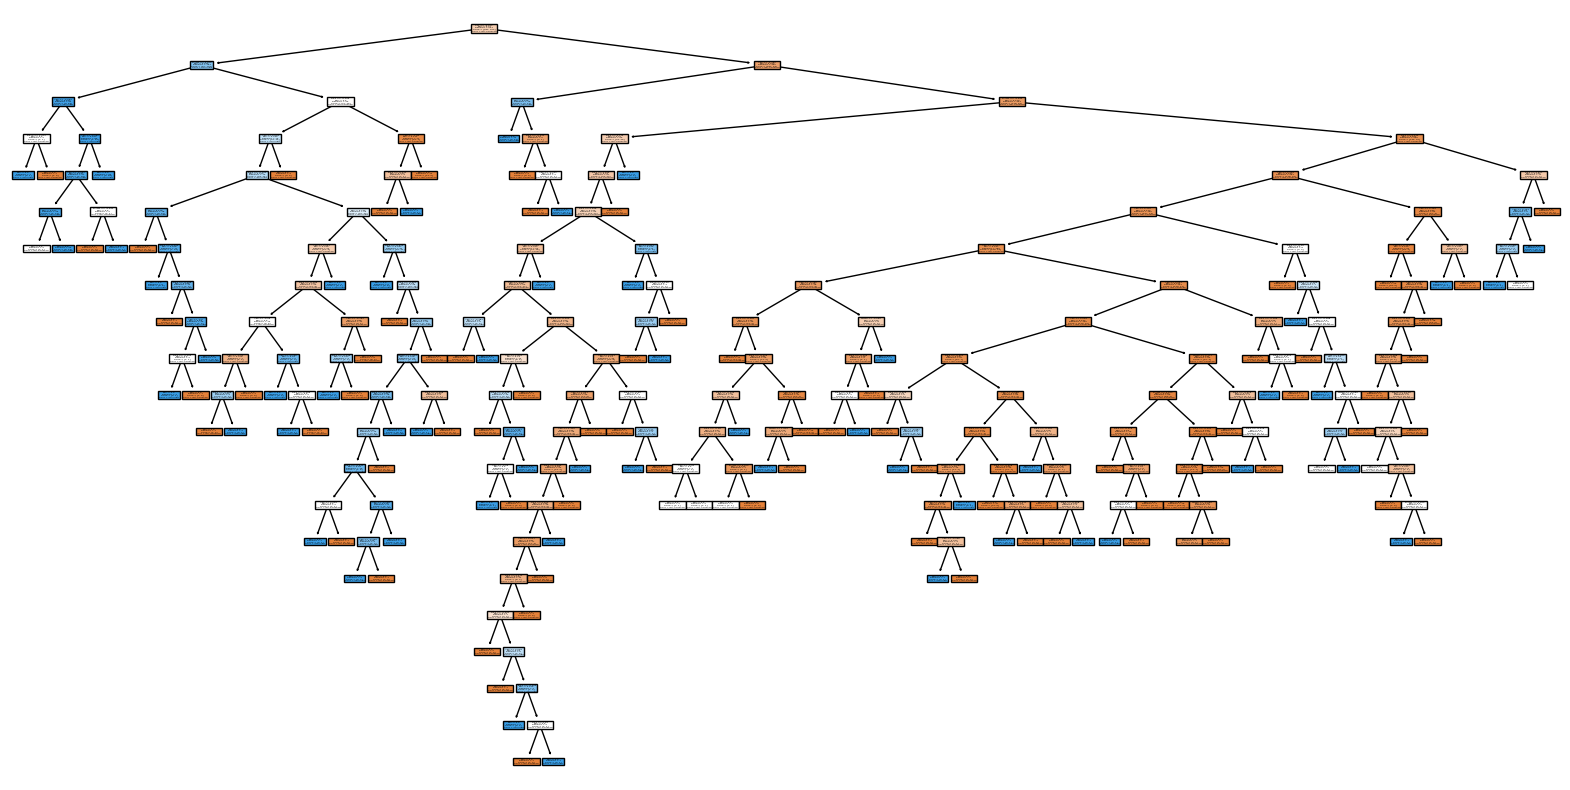

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Train the decision tree without restricting the depth
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=features, class_names=['Not Survived', 'Survived'])
plt.show()


Step 5: Compute Model Accuracy

In [10]:
from sklearn.metrics import accuracy_score

# Evaluate the accuracy on the development set
y_dev_pred = clf.predict(X_dev)
accuracy_dev = accuracy_score(y_dev, y_dev_pred)
print(f'Development Set Accuracy: {accuracy_dev:.4f}')


Development Set Accuracy: 0.7978


Step 6: Experiment with Different Max Depth Values
python

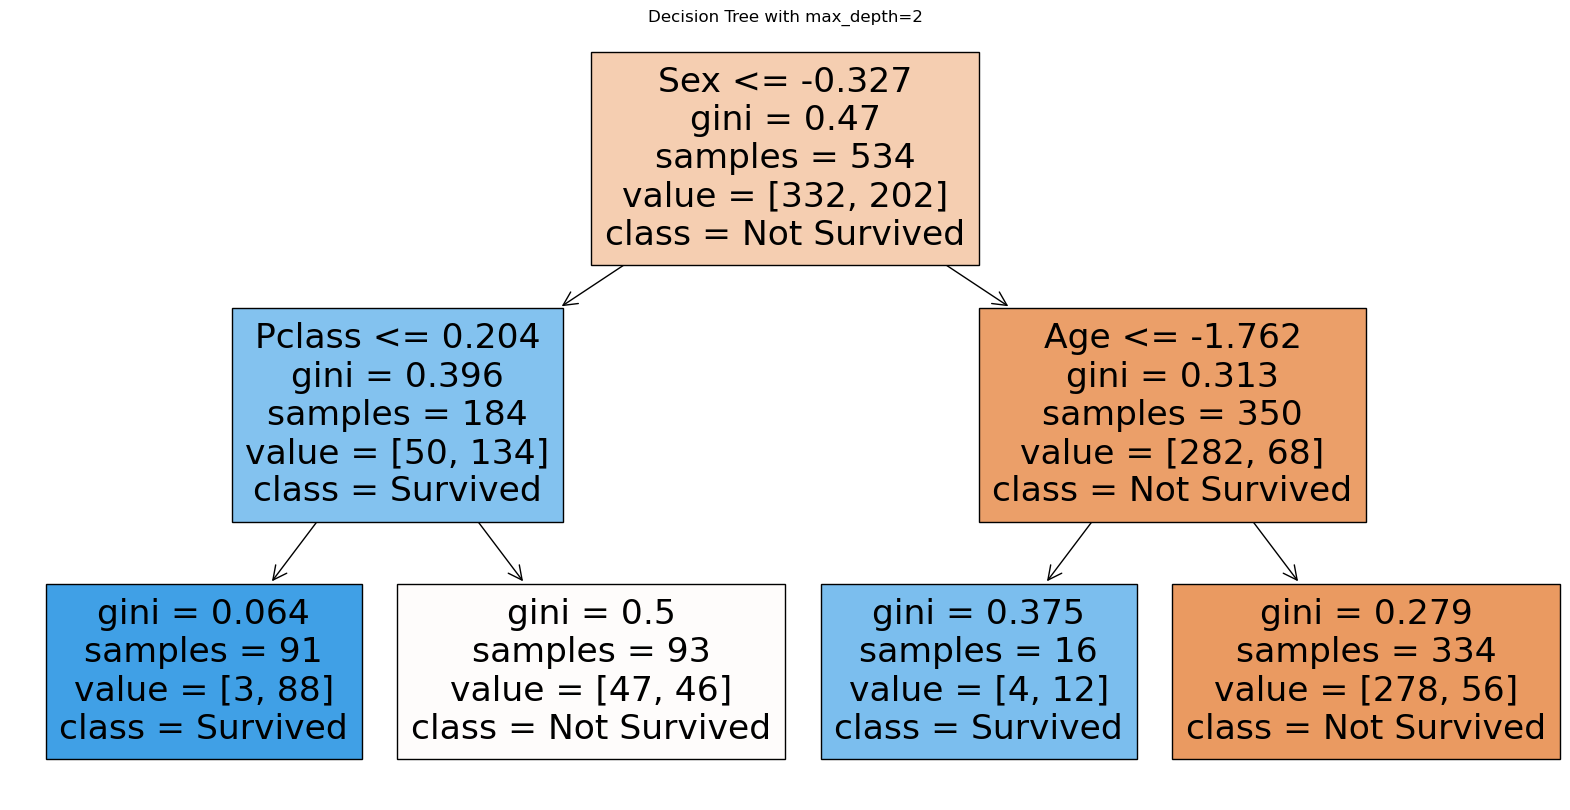

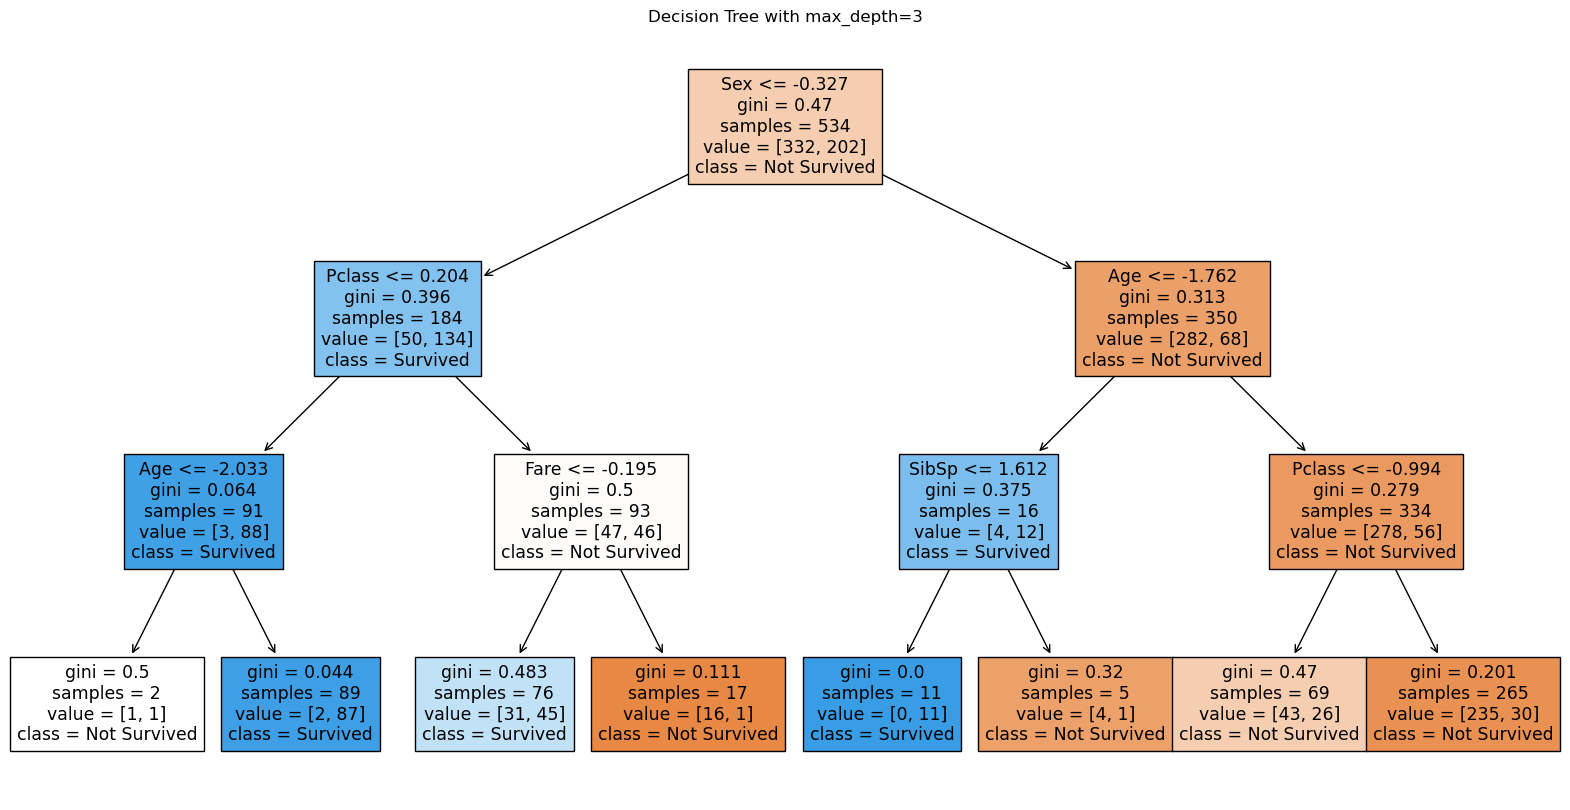

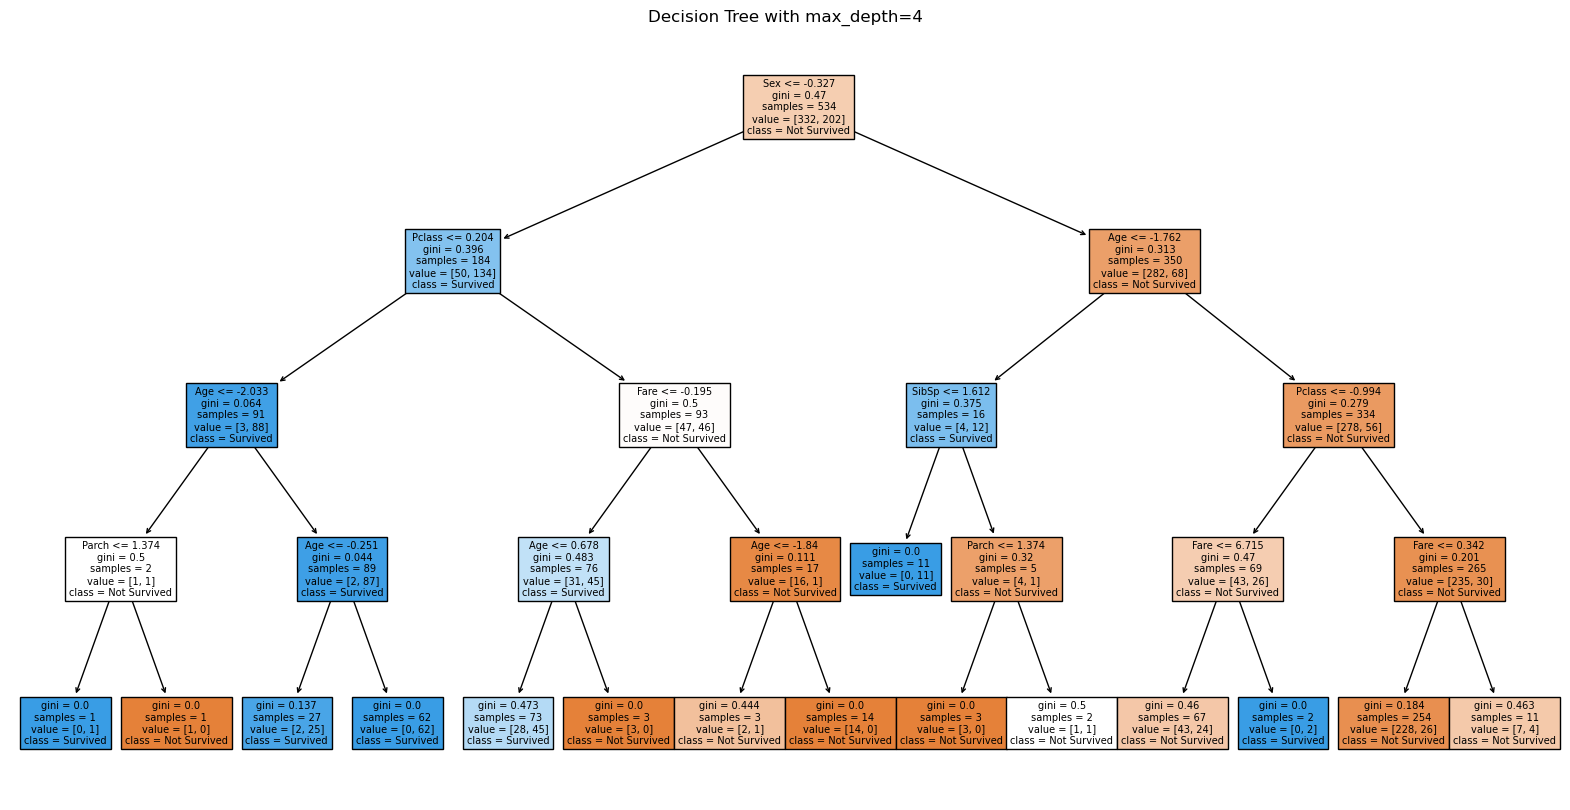

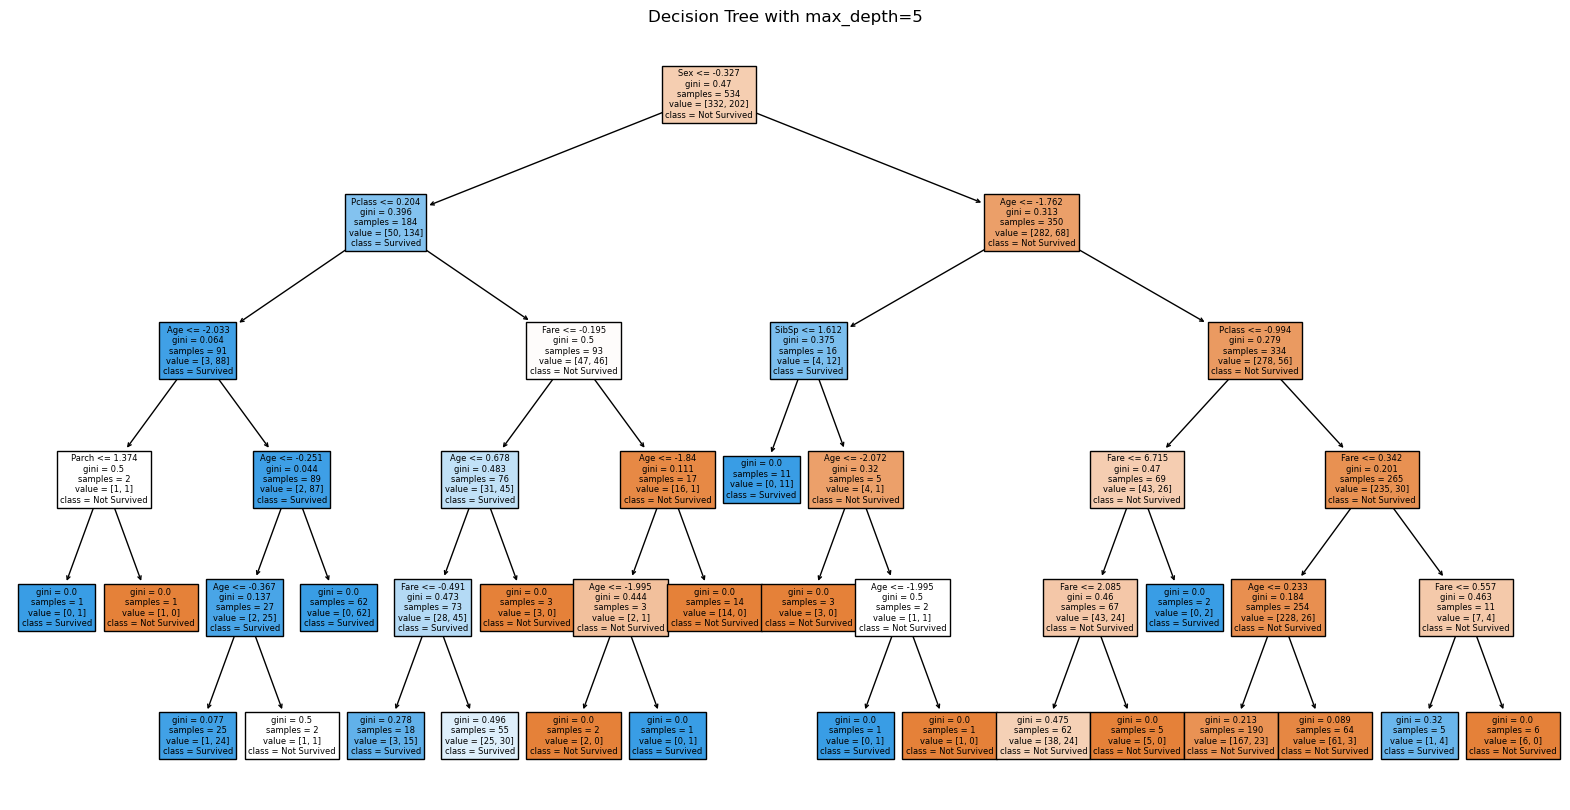

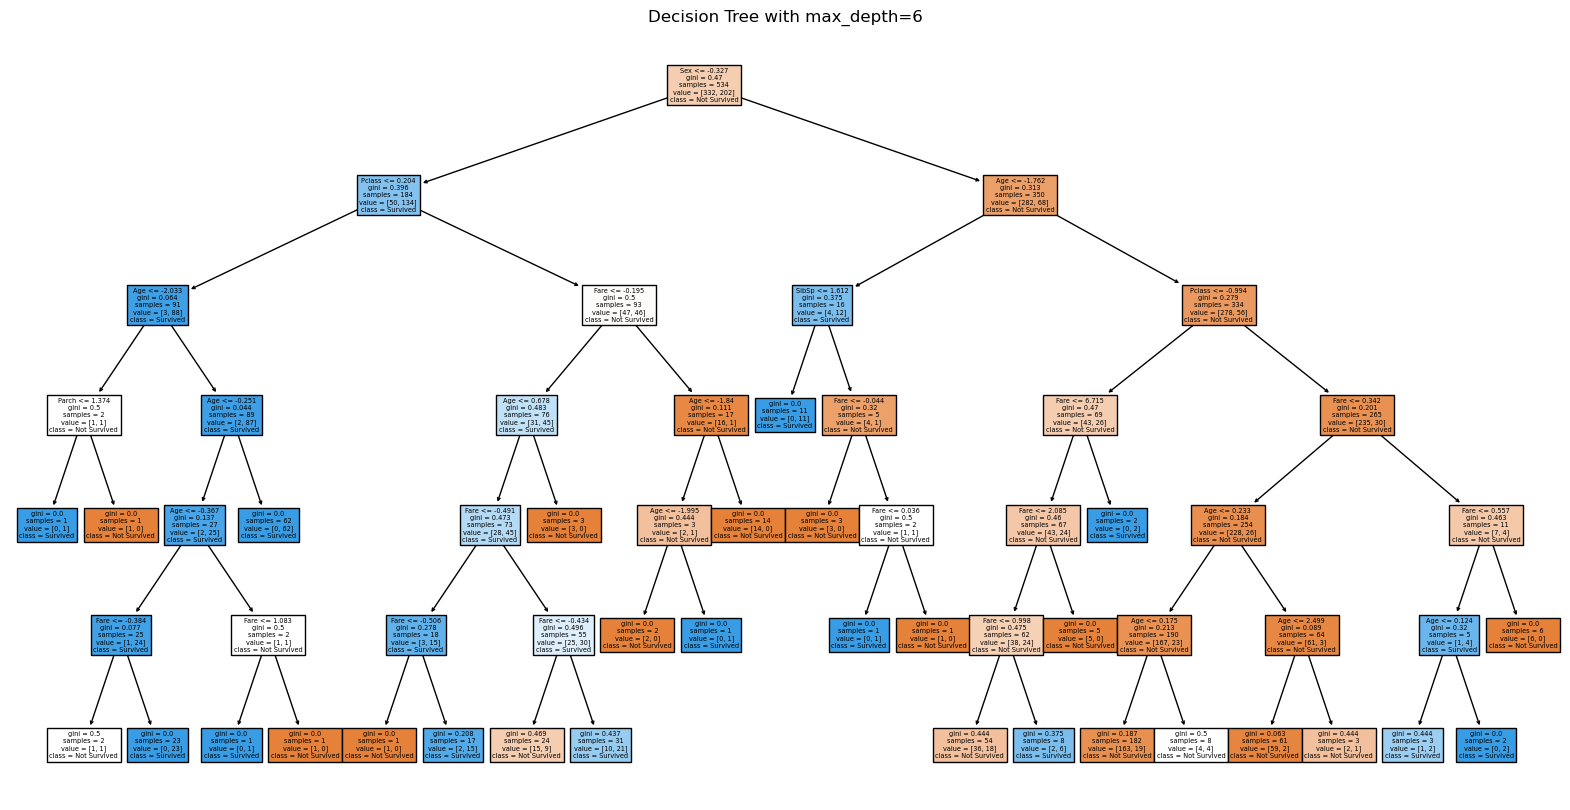

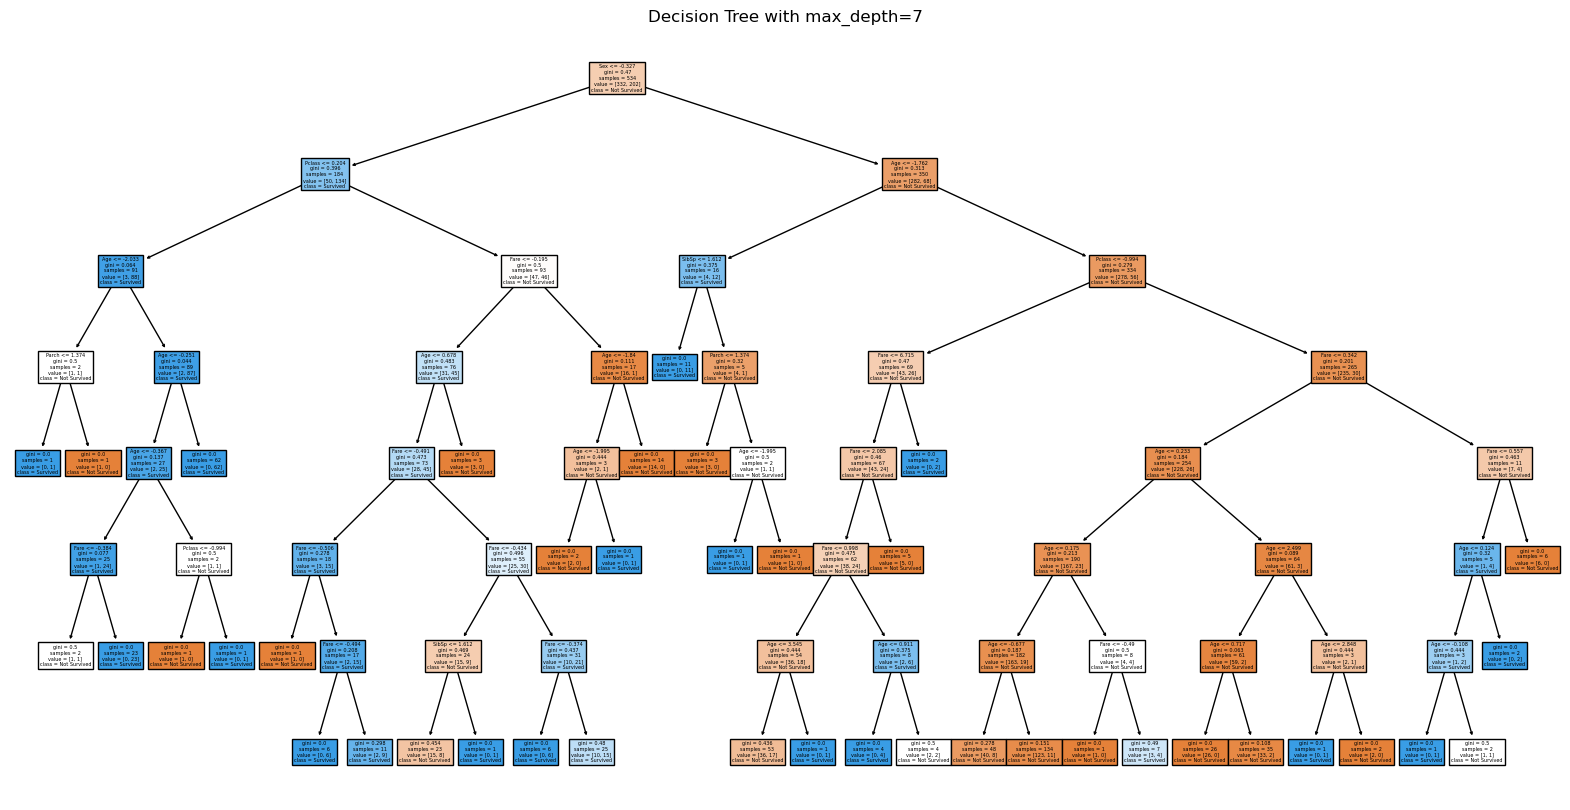

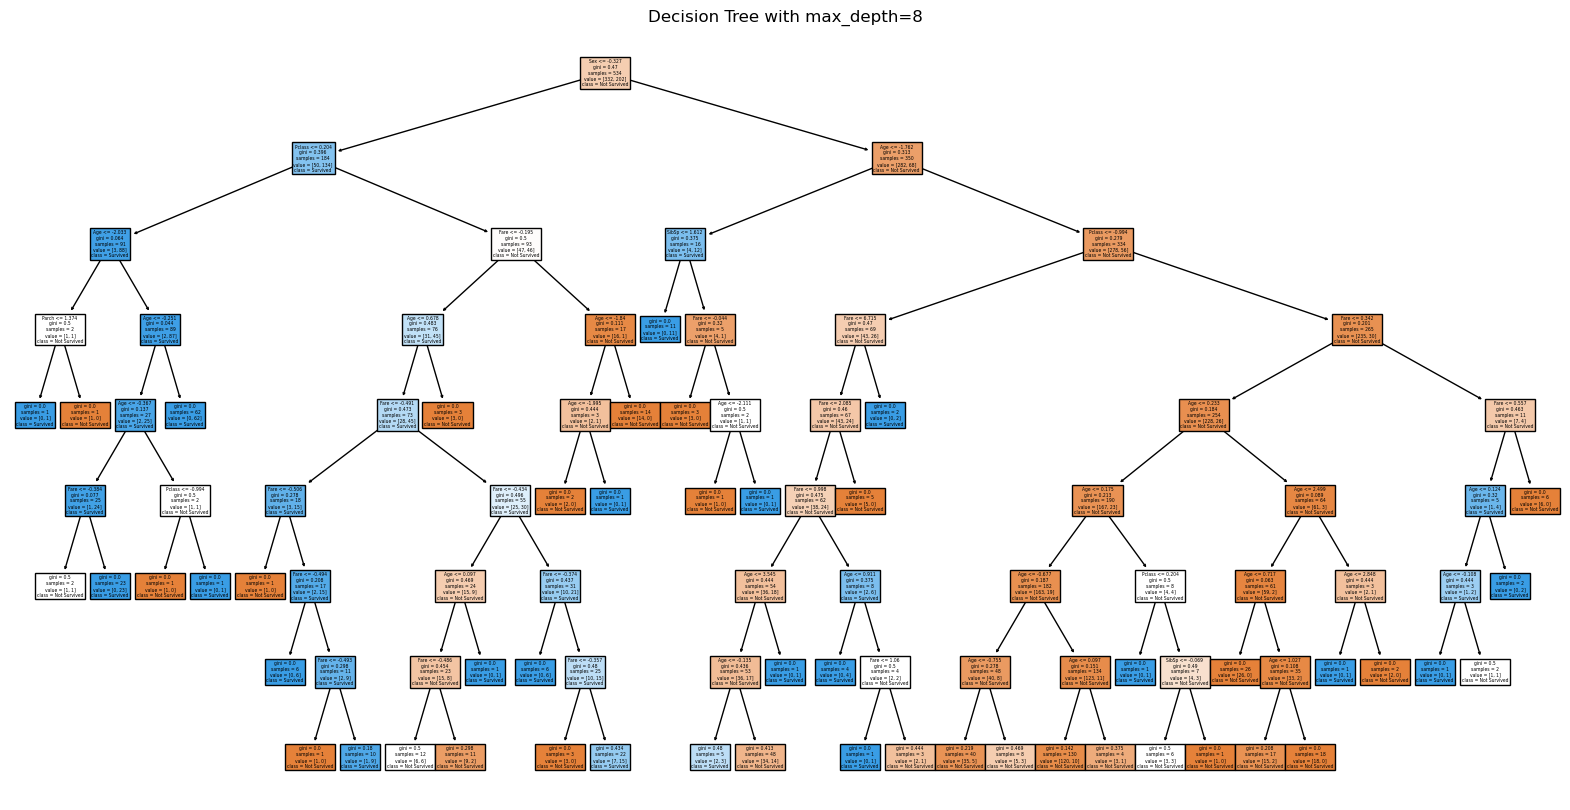

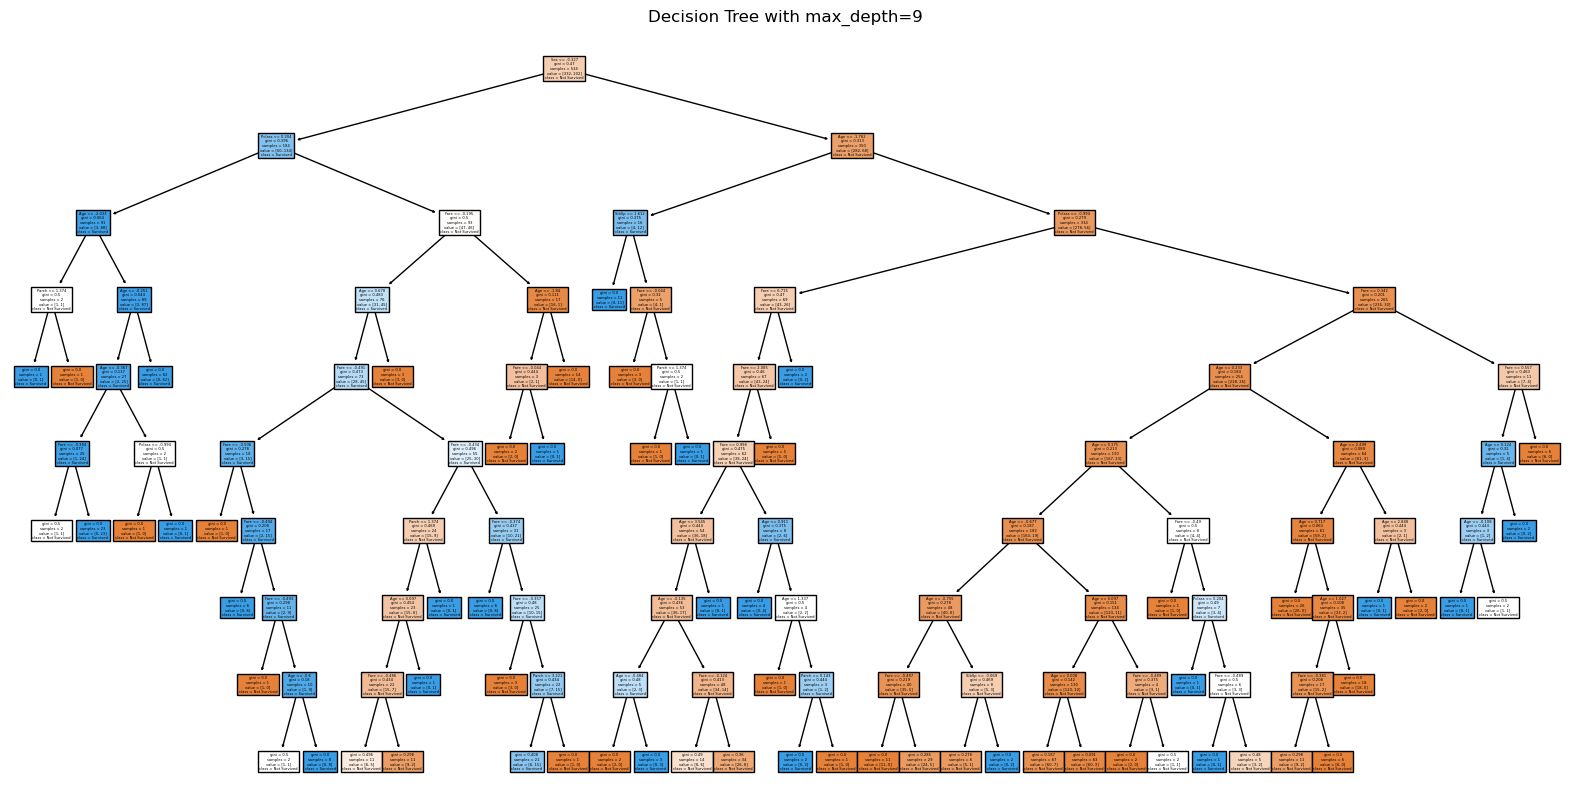

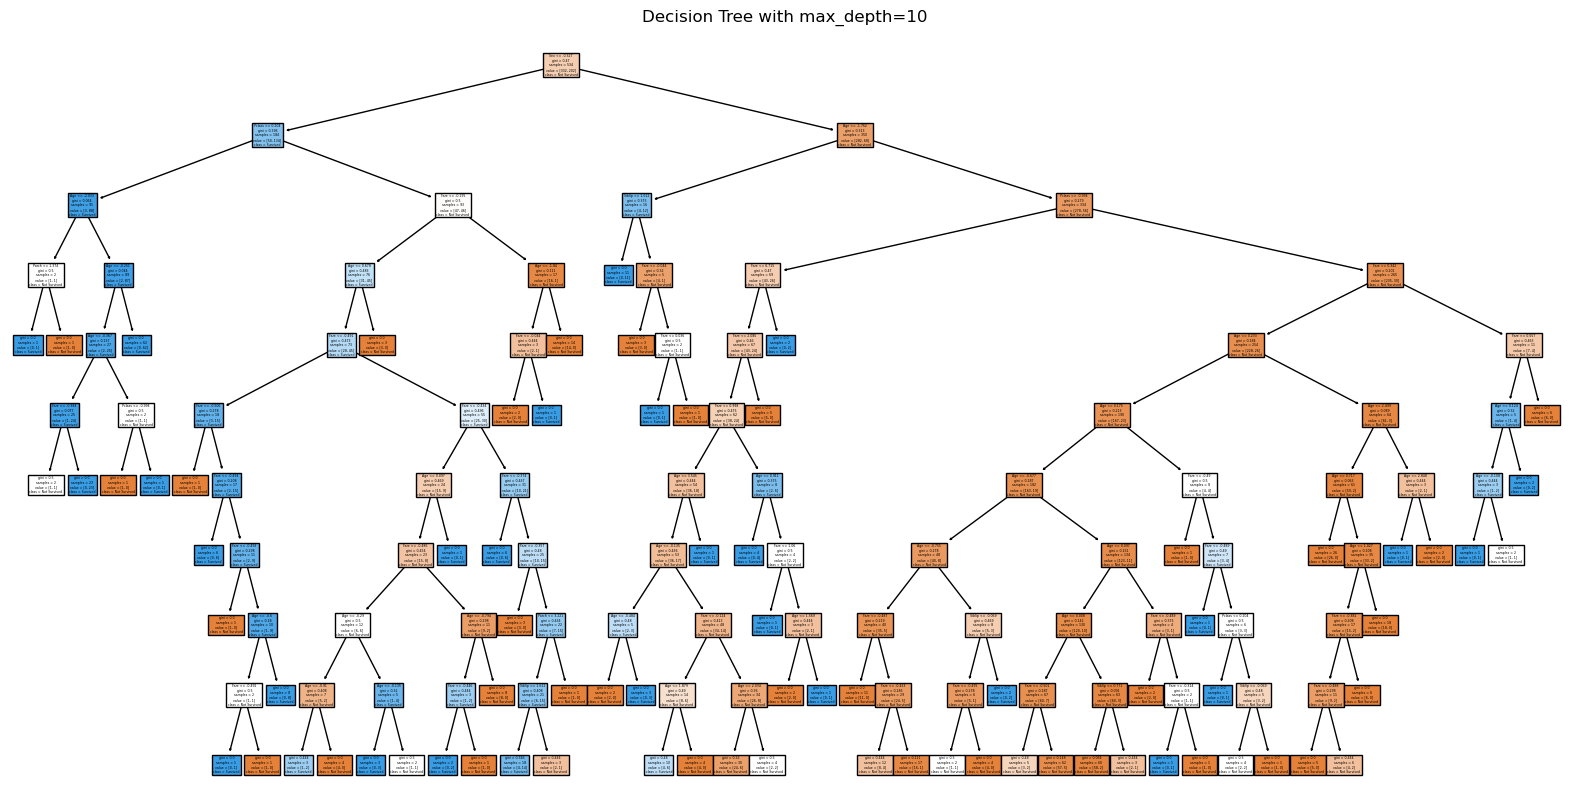

In [12]:
train_accuracies = []
dev_accuracies = []

for depth in range(2, 11):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    
    # Compute accuracy on training set
    y_train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    # Compute accuracy on development set
    y_dev_pred = clf.predict(X_dev)
    dev_accuracy = accuracy_score(y_dev, y_dev_pred)
    dev_accuracies.append(dev_accuracy)
    
    # Plot the tree
    plt.figure(figsize=(20,10))
    tree.plot_tree(clf, filled=True, feature_names=features, class_names=['Not Survived', 'Survived'])
    plt.title(f'Decision Tree with max_depth={depth}')
    plt.show()


Step 7: Plot Accuracy Trends

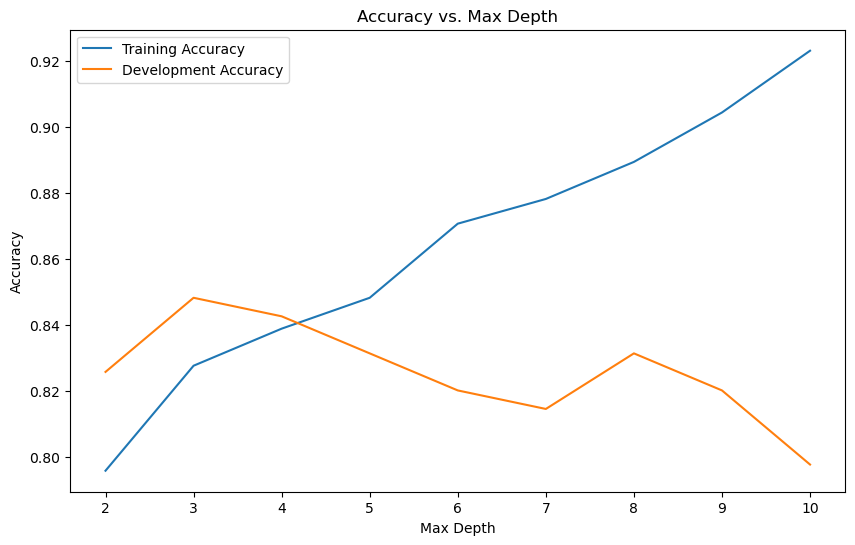

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), train_accuracies, label='Training Accuracy')
plt.plot(range(2, 11), dev_accuracies, label='Development Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Max Depth')
plt.legend()
plt.show()

# Analyze the shape of the lines


Step 8: Evaluate the Final Model

In [16]:
# Select the best max_depth based on development set accuracy
best_depth = range(2, 11)[dev_accuracies.index(max(dev_accuracies))]

# Train the final model with the best max_depth
final_clf = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
final_clf.fit(X_train, y_train)

# Evaluate on the test set
y_test_pred = final_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Set Accuracy: {test_accuracy:.4f}')


Test Set Accuracy: 0.7989
